### Using KMean Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Practice_01.csv')
data.head(5)

,Unnamed: 0,X1,X2
0,0,5.020077,2.583755
1,1,3.232367,1.195353
2,2,-6.107928,-9.728652
3,3,5.199669,3.053950
4,4,1.380819,4.593374


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   X1          1000 non-null   float64
 2   X2          1000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
data.shape

(1000, 3)

In [5]:
data.isnull().mean()*100

Unnamed: 0    0.0
X1            0.0
X2            0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop(columns = 'Unnamed: 0', inplace=True)
data.head(5)

,X1,X2
0,5.020077,2.583755
1,3.232367,1.195353
2,-6.107928,-9.728652
3,5.199669,3.053950
4,1.380819,4.593374


### K-Mean

#### Elbow Method

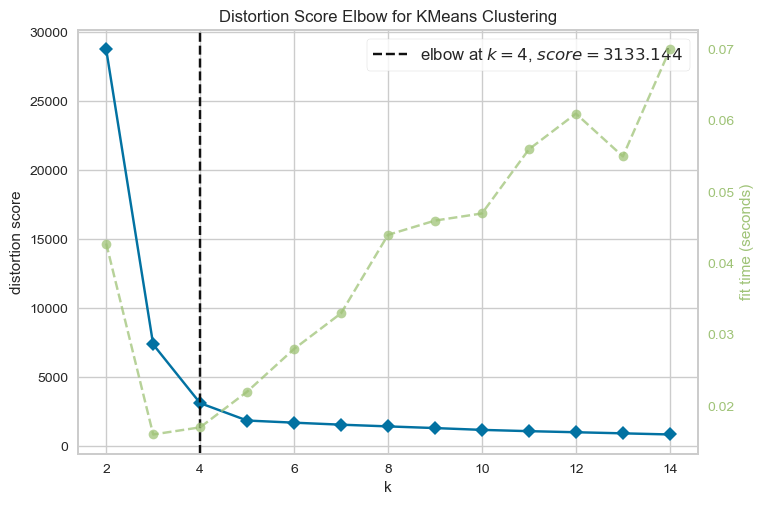

In [9]:
KM = KMeans()
graph = KElbowVisualizer(KM, k = range(2,15))
graph.fit(data)
graph.poof();

In [10]:
KM_4 = KMeans(n_clusters=4, random_state=42)

In [12]:
labels = KM_4.fit_predict(data)

In [13]:
data['cluster_ID'] = labels
data.head(5)

,X1,X2,cluster_ID
0,5.020077,2.583755,0
1,3.232367,1.195353,0
2,-6.107928,-9.728652,2
3,5.199669,3.053950,0
4,1.380819,4.593374,0


#### Silhouette Score

In [14]:
silhouette_score(data,labels)

0.733671076189917

#### Cluster Visualization

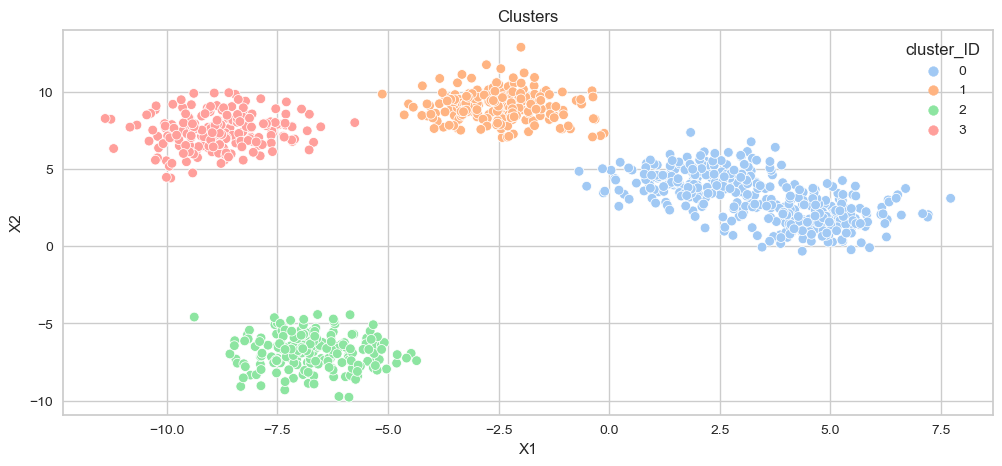

In [15]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=data,x='X1',y='X2',hue = 'cluster_ID',palette ='pastel')
plt.title('Clusters')
plt.show()